In [12]:
import sys
import os
sys.path.append("/home/kirilman/Project/asbestos/yolov5")
sys.path.append("/home/kirilman/Project/asbestos/")
import matplotlib.pyplot as plt
import random
import numpy as np
import math
import cv2
from tools import plot_bboxs
from pathlib import Path
from dataset.albumentaion import yolo_image_generator, Albumentations
%load_ext autoreload
%autoreload 2|
from utils.dataloaders import LoadImagesAndLabels, create_dataloader

/home/kirilman/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
IMG_SIZE = 728
inf, loader = create_dataloader(path_to_dataset, IMG_SIZE, 1, 0, single_cls= True, augment = True, hyp={"degrees":45, #поворот
                                                                    "translate":0.,
                                                                    "scale":0.01,              #маштабирование
                                                                            "shear":0.3,      #сферические линии
                                                                            "perspective":0.0,
                                                                    "copy_paste":0.5,
                                                                    "flipud":0,
                                                                    "mixup":0.5,
                                                                                                        
                                                                    "mosaic": True,
                                                                    "hsv_h": 1,
                                                                    "hsv_v": 1, "hsv_s":1, "fliplr":1,"fliplr":1,
                                                                                                        
                                                                    })

albumentations: Blur(always_apply=False, p=0.01, blur_limit=(3, 7)), MedianBlur(always_apply=False, p=0.01, blur_limit=(3, 7)), ToGray(always_apply=False, p=0.01), CLAHE(always_apply=False, p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
Scanning '../../../dataset/detection_set2/labels' images and labels...485 found,
New cache created: ../../../dataset/detection_set2/labels.cache


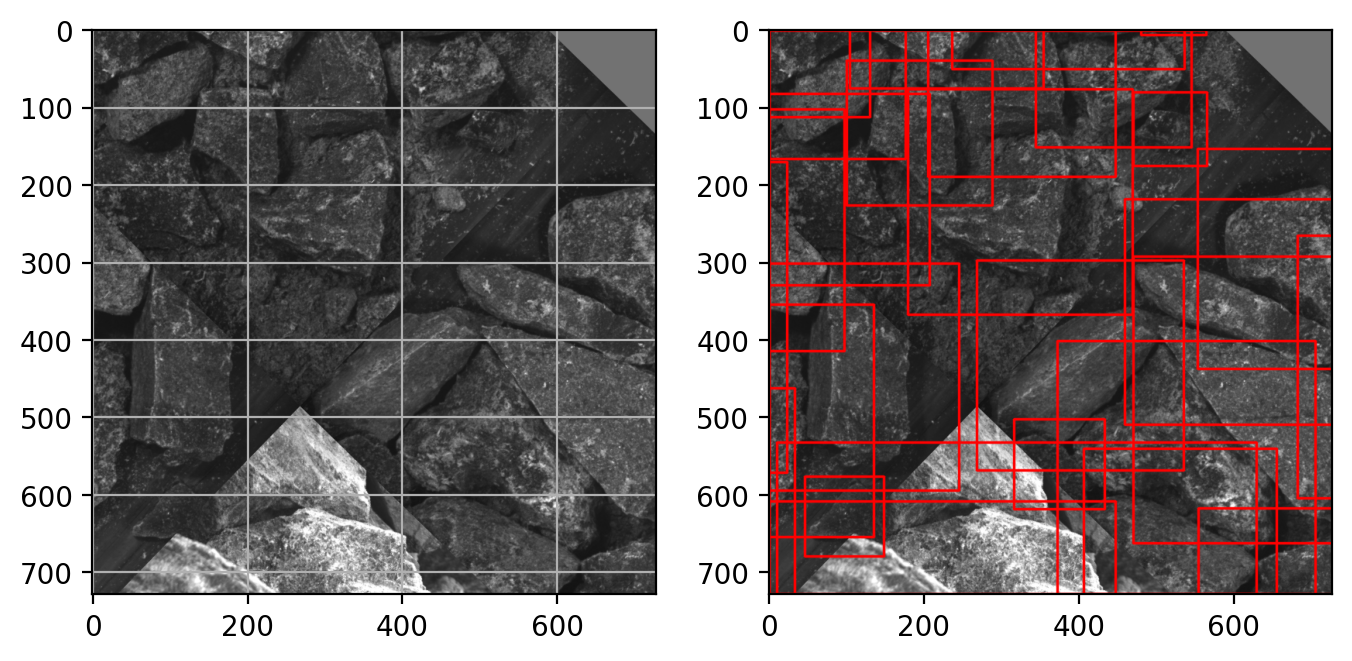

In [22]:
img, labels = loader.load_mosaic(0)
fig, axs = plt.subplots(1,2, figsize = (8,8), dpi = 200)
axs[0].imshow(img)
axs[0].grid('minor')
img = plot_bboxs(img, labels[:,1:]/IMG_SIZE)
axs[1].imshow(img)

In [11]:
IMG_SIZE = 728
inf, loader = create_dataloader(path_to_dataset, IMG_SIZE, 1, 0, single_cls= True, augment = True, hyp={"degrees":0, #поворот
                                                                    "translate":0.,
                                                                    "scale":0.01,              #маштабирование
                                                                            "shear":0.3,      #сферические линии
                                                                            "perspective":0.0,
                                                                    "copy_paste":0.5,
                                                                    "flipud":0,
                                                                    "mixup":0.5,
                                                                                                        
                                                                    "mosaic": False,
                                                                    "hsv_h": 1,
                                                                    "hsv_v": 1, "hsv_s":1, "fliplr":1,"fliplr":1,
                                                                                                        
                                                                    })

albumentations: Blur(always_apply=False, p=0.01, blur_limit=(3, 7)), MedianBlur(always_apply=False, p=0.01, blur_limit=(3, 7)), ToGray(always_apply=False, p=0.01), CLAHE(always_apply=False, p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
Scanning '/home/kirilman/Project/dataset/detection_set2/labels.cache' images and


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


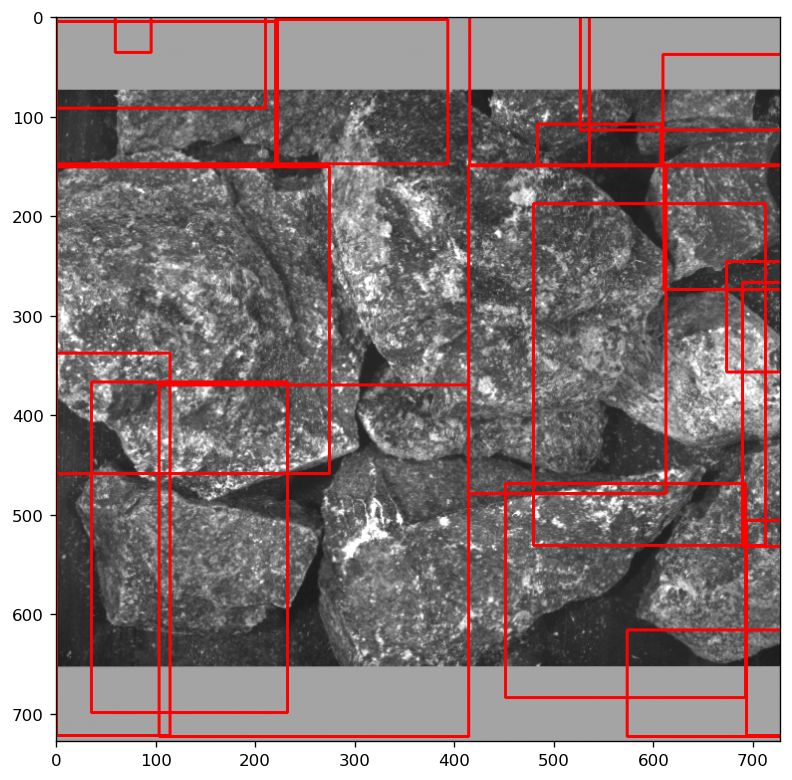

In [14]:
exm = loader[112]
img = exm[0].numpy()
labesls = exm[1].numpy()
t = np.zeros((IMG_SIZE,IMG_SIZE,3))
t[:,:,0] = img[0,:,:]
t[:,:,1] = img[1,:,:]
t[:,:,2] = img[2,:,:]
del img
img = t
img = img/img.max()

img = plot_bboxs(img, labels[:,1:]/IMG_SIZE)
plt.figure(figsize = (8,8),dpi = 120)
plt.imshow(img)

IndexError: index 3 is out of bounds for axis 0 with size 3

<Figure size 864x864 with 0 Axes>

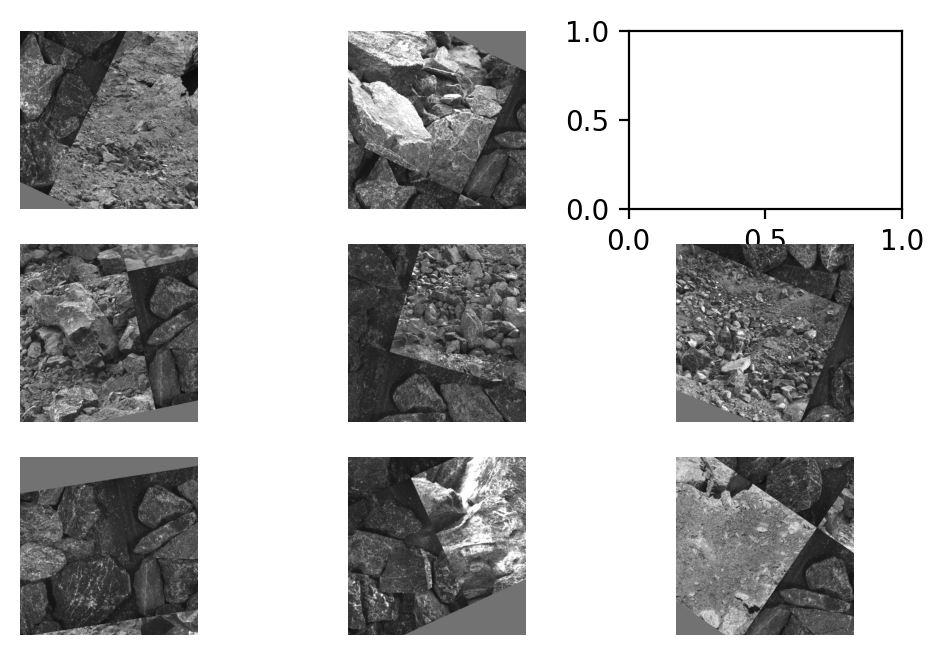

In [30]:
plt.figure(figsize = (12,12))

img, labels = loader.load_mosaic(15)
# labels = loader.labels[6]

N = 3
r = k = 0
f, axes = plt.subplots(N,N, dpi = 200)
plt.axis('off')  
for i in range(N*N):
    img, labels = loader.load_mosaic(0)
    axes[r,k].imshow(img)
    axes[r,k].axis('off')  
    k+=1
    if i%3 == 1:
        r +=1
        k = 0


In [11]:
img, labels = loader.load_mosaic(0)
plt.figure(dpi = 100)
plt.imshow(plot_bboxs(img, labels[:,1:]/IMG_SIZE))

NameError: name 'loader' is not defined

In [ ]:
!python ../../yolov5/detect.py --weights /home/kirilman/Project/asbestos/yolov5/runs/train/without_aug_x/weights/best.pt --img 512 --conf 0.7 --source /home/kirilman/Project/dataset/detection_set2/test/

In [8]:
!python ../../yolov5/train.py --img 512 --batch 4 --epochs 200 --data ../../../dataset/detection_set2/data_simple.yaml --weights yolov5x.pt --single-cls --name 'without_aug_x'  

train: weights=yolov5x.pt, cfg=, data=../../../dataset/detection_set2/data_simple.yaml, hyp=../../yolov5/data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=4, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=True, optimizer=SGD, sync_bn=False, workers=8, project=../../yolov5/runs/train, name=without_aug_x, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 78 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.9.12 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5947MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_

In [9]:
  Class     Images     Labels          P          R     mAP@.5 mAP@
    all         18        788      0.876      0.378      0.637       0.47

SyntaxError: invalid syntax (1535589192.py, line 1)

In [10]:
!python ../../yolov5/val.py --weights /home/kirilman/Project/asbestos/yolov5/runs/train/without_aug_x/weights/best.pt --img 512 --conf 0.7 --data /home/kirilman/Project/dataset/detection_set2/data.yaml 

val: data=/home/kirilman/Project/dataset/detection_set2/data.yaml, weights=['/home/kirilman/Project/asbestos/yolov5/runs/train/without_aug_x/weights/best.pt'], batch_size=32, imgsz=512, conf_thres=0.7, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=../../yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.9.12 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5947MiB)

Fusing layers... 
Model summary: 444 layers, 86173414 parameters, 0 gradients
val: Scanning '/home/kirilman/Project/dataset/detection_set2/validation.cache' i
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         18        788      0.839      0.537      0.703      0.525
Speed: 0.8ms pre-process, 20.7ms inference, 3.0ms NMS per image at shape (32, 3, 512, 512)
Results saved to ../../yo

In [ ]:
0.818,0.456,0.655,0.484